In [ ]:
import pandas as pd
url = '/content/Student_Mental_Stress_and_Coping_Mechanisms.csv'
df = pd.read_csv(url)
print(df)

      Student ID  Age       Gender  Academic Performance (GPA)  \
0    802-17-3671   22       Female                           2   
1    871-12-8572   25       Female                           0   
2    495-13-2672   24       Female                           0   
3    365-77-2496   20         Male                           2   
4    664-76-5622   28         Male                           0   
..           ...  ...          ...                         ...   
755  826-89-7993   24  Genderfluid                           2   
756  681-15-6754   23       Female                           3   
757  714-33-5373   23         Male                           1   
758  849-54-1252   29       Female                           1   
759  862-68-5364   21       Female                           3   

     Study Hours Per Week  Social Media Usage (Hours per day)  \
0                       9                                   2   
1                      28                                   0   
2           

In [ ]:
print(df.isnull().sum())
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

Student ID                            0
Age                                   0
Gender                                0
Academic Performance (GPA)            0
Study Hours Per Week                  0
Social Media Usage (Hours per day)    0
Sleep Duration (Hours per night)      0
Physical Exercise (Hours per week)    0
Family Support                        0
Financial Stress                      0
Peer Pressure                         0
Relationship Stress                   0
Mental Stress Level                   0
Counseling Attendance                 0
Diet Quality                          0
Stress Coping Mechanisms              0
Cognitive Distortions                 0
Family Mental Health History          0
Medical Condition                     0
Substance Use                         0
dtype: int64


In [ ]:
df = pd.get_dummies(df, columns=['Gender','Family Mental Health History','Medical Condition'])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['Age', 'Study Hours Per Week']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [ ]:
X = df.drop(columns=['Counseling Attendance','Stress Coping Mechanisms', 'Student ID'])
y = df['Substance Use']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)

print(f'Logistic Regression Accuracy: {accuracy_log_reg}')
print(f'Confusion Matrix:\n{conf_matrix_log_reg}')
print(f'Classification Report:\n{class_report_log_reg}')


Logistic Regression Accuracy: 0.9736842105263158
Confusion Matrix:
[[27  0  0  0  0]
 [ 0 30  1  0  0]
 [ 0  0 25  1  0]
 [ 0  0  0 34  1]
 [ 0  0  0  1 32]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      0.97      0.98        31
           3       0.96      0.96      0.96        26
           4       0.94      0.97      0.96        35
           5       0.97      0.97      0.97        33

    accuracy                           0.97       152
   macro avg       0.98      0.97      0.97       152
weighted avg       0.97      0.97      0.97       152



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Confusion Matrix:\n{conf_matrix_rf}')
print(f'Classification Report:\n{class_report_rf}')


Random Forest Accuracy: 1.0
Confusion Matrix:
[[27  0  0  0  0]
 [ 0 31  0  0  0]
 [ 0  0 26  0  0]
 [ 0  0  0 35  0]
 [ 0  0  0  0 33]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        33

    accuracy                           1.00       152
   macro avg       1.00      1.00      1.00       152
weighted avg       1.00      1.00      1.00       152



In [ ]:
from sklearn.svm import SVC
svm_model = SVC()

svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print(f'SVM Accuracy: {accuracy_svm}')
print(f'Confusion Matrix:\n{conf_matrix_svm}')
print(f'Classification Report:\n{class_report_svm}')


SVM Accuracy: 0.7302631578947368
Confusion Matrix:
[[20  7  0  0  0]
 [10 15  6  0  0]
 [ 0  0 26  0  0]
 [ 0  0  9 24  2]
 [ 0  0  0  7 26]]
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.74      0.70        27
           2       0.68      0.48      0.57        31
           3       0.63      1.00      0.78        26
           4       0.77      0.69      0.73        35
           5       0.93      0.79      0.85        33

    accuracy                           0.73       152
   macro avg       0.74      0.74      0.72       152
weighted avg       0.75      0.73      0.73       152



In [ ]:
from sklearn.metrics import classification_report
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log_reg))

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

print("SVM Performance:")
print(classification_report(y_test, y_pred_svm))

Logistic Regression Performance:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      0.97      0.98        31
           3       0.96      0.96      0.96        26
           4       0.94      0.97      0.96        35
           5       0.97      0.97      0.97        33

    accuracy                           0.97       152
   macro avg       0.98      0.97      0.97       152
weighted avg       0.97      0.97      0.97       152

Random Forest Performance:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        33

    accuracy                           1.00       152
   macro avg       1.00      1.00      1.00       152
weighted avg     

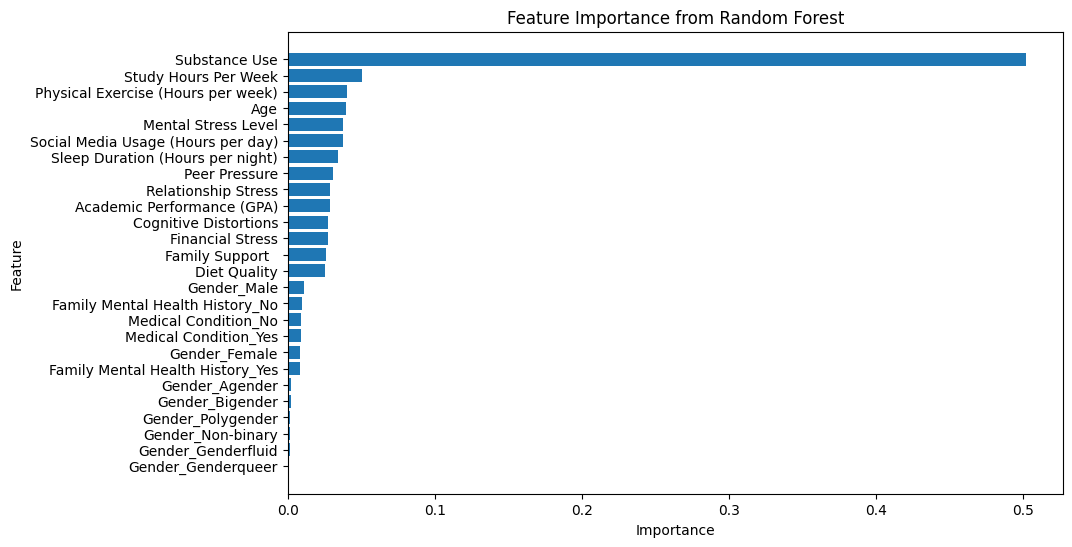

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()


Explained variance ratio: [0.08137312 0.07793985]


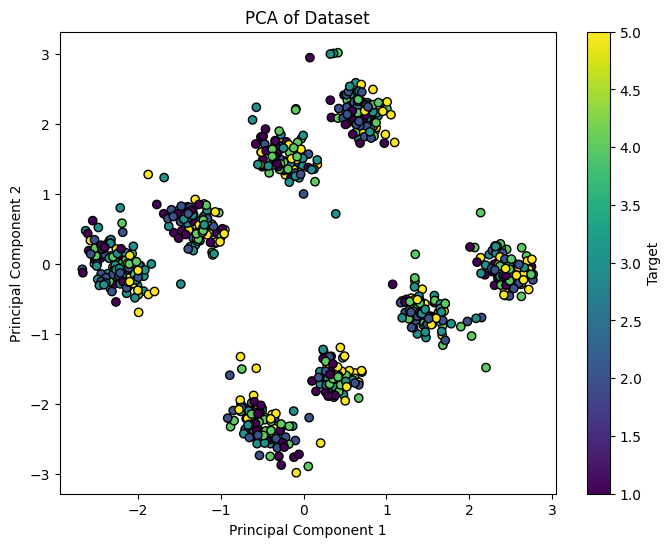

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f'Explained variance ratio: {pca.explained_variance_ratio_}')

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.colorbar(label='Target')
plt.show()


In [ ]:
from scipy import stats
stress_scores = df['Mental Stress Level'].values

t_statistic, p_value = stats.ttest_1samp(stress_scores, 5)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The sample mean is significantly different from 5.")
else:
    print("Fail to reject the null hypothesis: The sample mean is not significantly different from 5.")


T-statistic: 3.4488698737224532
P-value: 0.0005939960520346076
Reject the null hypothesis: The sample mean is significantly different from 5.


In [ ]:
import pandas as pd
from statsmodels.stats.weightstats import ztest
sample_data = df[['Study Hours Per Week','Age']]

z_stat, p_value = ztest(sample_data, value=5)

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

Z-statistic: [-137.74977314 -137.74977314]
P-value: [0. 0.]
